
## 🎬 Start_Tech_Oscar Prediction using Decision Tree Classification

### 📌 Project Overview

In this project, a **Decision Tree Classification** model is developed to predict whether a movie can win the **Start_Tech_Oscar** award or not. The model uses various movie-related, production, and marketing features to perform binary classification.

### 📊 Dataset Description

The dataset consists of multiple features that describe different aspects of movies, including financial, technical, and popularity-related factors. The features are:

* **Marketing Expense**
* **Production Expense**
* **Multiplex Coverage**
* **Budget**
* **Movie Length**
* **Lead Actor Rating**
* **Lead Actress Rating**
* **Director Rating**
* **Producer Rating**
* **Critic Rating**
* **Trailer Views**
* **3D Available**
* **Time Taken**
* **Twitter Hashtags**
* **Genre**
* **Average Age of Actors**
* **Number of Multiplexes**
* **Collection**

### 🎯 Target Variable

* **Start_Tech_Oscar**
  A binary target label indicating whether a movie wins the Start_Tech_Oscar award or not.

### 🧠 Model Used

* **Decision Tree Classifier**
  This model is chosen to handle complex decision boundaries and interpret feature importance in predicting Oscar-winning movies.




In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pydotplus
from IPython.display import Image


In [3]:
df = pd.read_csv("Movie_classification.csv")

In [4]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Missing Value Imputation

In [7]:
df.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [8]:
df["Time_taken"].fillna(df["Time_taken"].mean(), inplace=True)

In [9]:
df.isna().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

<Axes: >

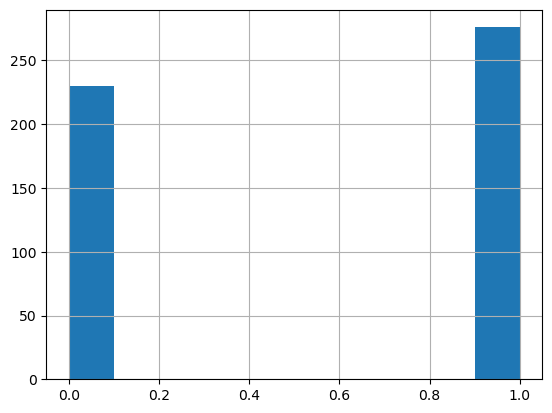

In [15]:
df["Start_Tech_Oscar"].hist()

### Dummy Variable Creation

In [16]:
df = pd.get_dummies(df, columns=["3D_available","Genre"], drop_first=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

### Building the model

In [19]:
X = df.loc[:,df.columns != "Start_Tech_Oscar"]
#X = df.drop("Start_Tech_Oscar", axis=1)

In [21]:
y = df["Start_Tech_Oscar"]

In [24]:
X.shape, len(X), y.shape, len(y)

((506, 20), 506, (506,), 506)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1988)

In [26]:
cls_tree = DecisionTreeClassifier(max_depth=4,min_samples_split=20, min_samples_leaf=20)

In [27]:
cls_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=20)

In [28]:
cls_tree.score(X_train,y_train)

0.6386138613861386

In [29]:
y_pred = cls_tree.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.4803921568627451

In [31]:
confusion_matrix(y_test,y_pred)

array([[ 9, 42],
       [11, 40]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.18      0.25        51
           1       0.49      0.78      0.60        51

    accuracy                           0.48       102
   macro avg       0.47      0.48      0.43       102
weighted avg       0.47      0.48      0.43       102



### Plotting Decision tree

In [41]:
dot_data = export_graphviz(cls_tree, out_file= None, feature_names=X_train.columns, filled=True)

In [42]:
graph = pydotplus.graph_from_dot_data(dot_data)

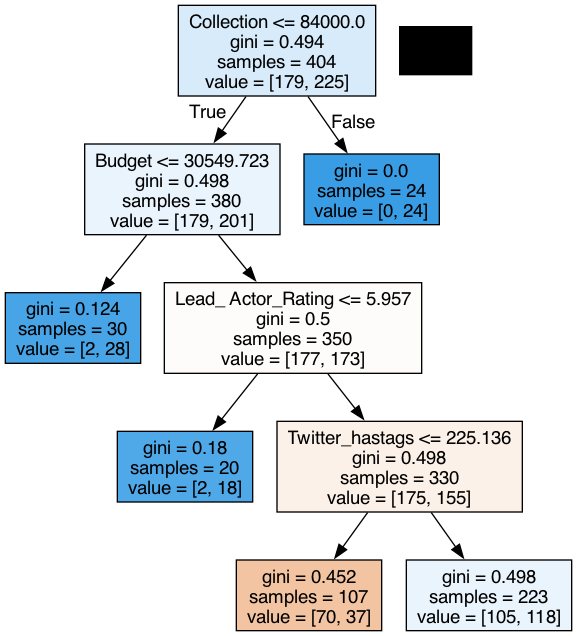

In [45]:
Image(graph.create_png())

### Tuning parameters:
- max_depth
- min_samples_split
- min_samoles_leaf

In [53]:
cls_tree1 = DecisionTreeClassifier(max_depth=4)
cls_tree1.fit(X_train,y_train)
y_pred = cls_tree1.predict(X_test)
print(f"model_score_train: {cls_tree1.score(X_train,y_train):.2f}\n")
print(f"confusion matrix:\n {confusion_matrix(y_test,y_pred)}\n")
print(f"Classification_report:\n{classification_report(y_test,y_pred)}")

model_score_train: 0.63

confusion matrix:
 [[10 41]
 [14 37]]

Classification_report:
              precision    recall  f1-score   support

           0       0.42      0.20      0.27        51
           1       0.47      0.73      0.57        51

    accuracy                           0.46       102
   macro avg       0.45      0.46      0.42       102
weighted avg       0.45      0.46      0.42       102



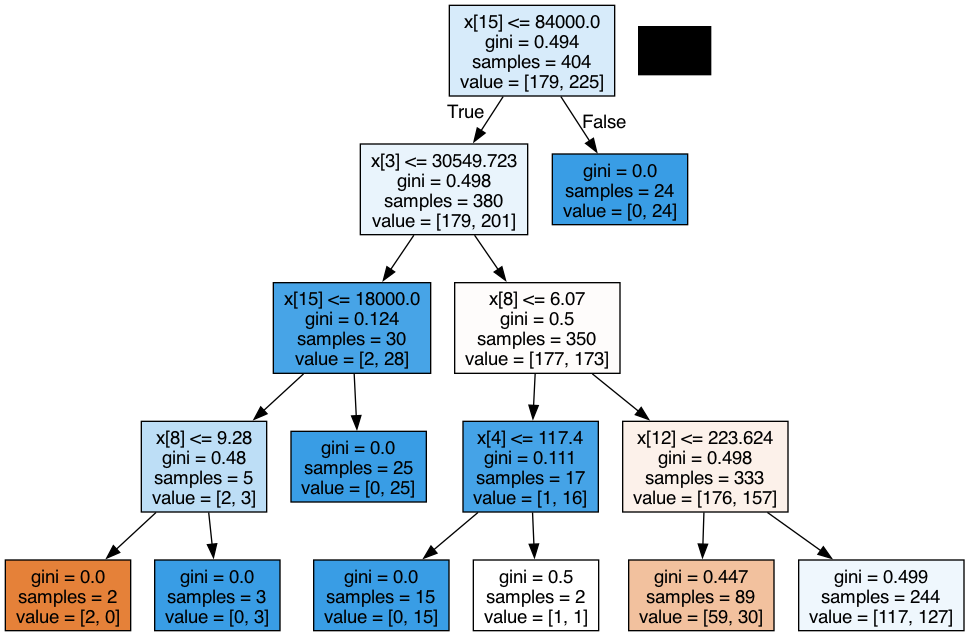

In [56]:
dot_data = export_graphviz(cls_tree1,filled= True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [59]:
cls_tree2 = DecisionTreeClassifier(min_samples_split=20)
cls_tree2.fit(X_train,y_train)
y_pred = cls_tree2.predict(X_test)
print(f"model_score_train: {cls_tree2.score(X_train,y_train):.2f}\n")
print(f"confusion matrix:\n {confusion_matrix(y_test,y_pred)}\n")
print(f"Classification_report:\n{classification_report(y_test,y_pred)}")

model_score_train: 0.85

confusion matrix:
 [[23 28]
 [18 33]]

Classification_report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        51
           1       0.54      0.65      0.59        51

    accuracy                           0.55       102
   macro avg       0.55      0.55      0.54       102
weighted avg       0.55      0.55      0.54       102



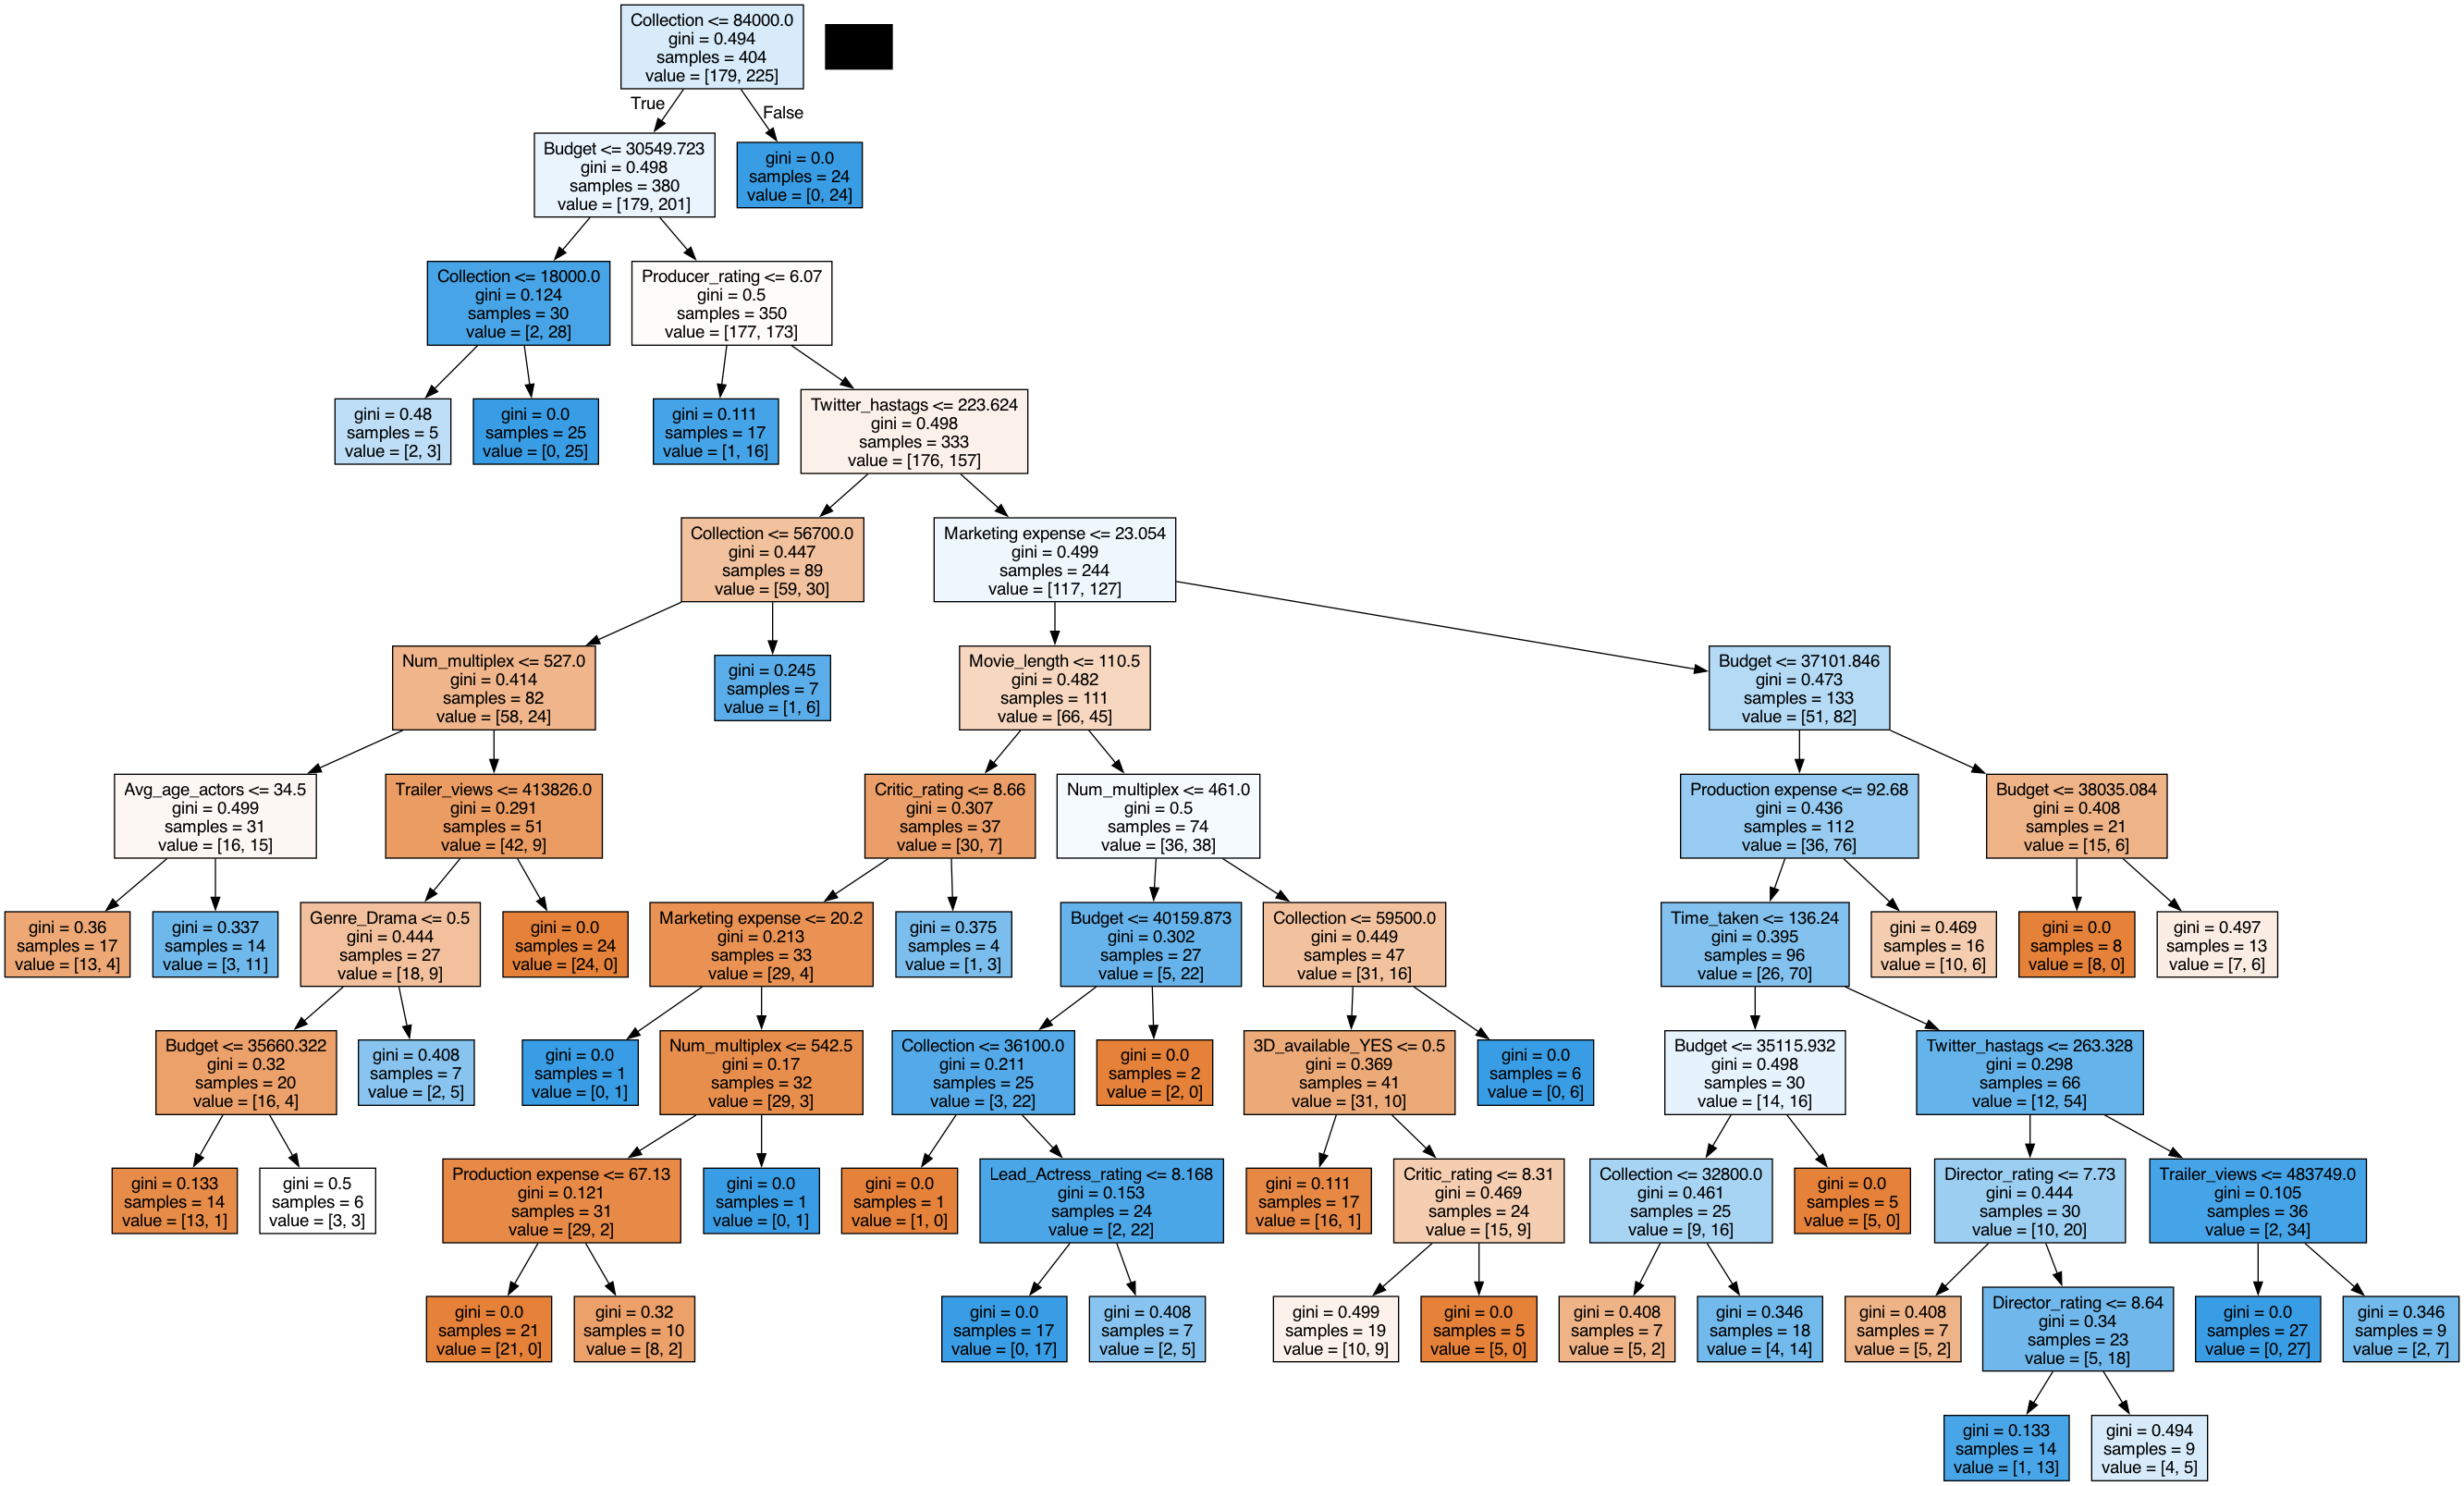

In [60]:
dot_data = export_graphviz(cls_tree2,out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [61]:
cls_tree3 = DecisionTreeClassifier(min_samples_leaf=20)
cls_tree3.fit(X_train,y_train)
y_pred = cls_tree3.predict(X_test)
print(f"model_score_train: {cls_tree3.score(X_train,y_train):.2f}\n")
print(f"confusion matrix:\n {confusion_matrix(y_test,y_pred)}\n")
print(f"Classification_report:\n{classification_report(y_test,y_pred)}")

model_score_train: 0.72

confusion matrix:
 [[33 18]
 [25 26]]

Classification_report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61        51
           1       0.59      0.51      0.55        51

    accuracy                           0.58       102
   macro avg       0.58      0.58      0.58       102
weighted avg       0.58      0.58      0.58       102



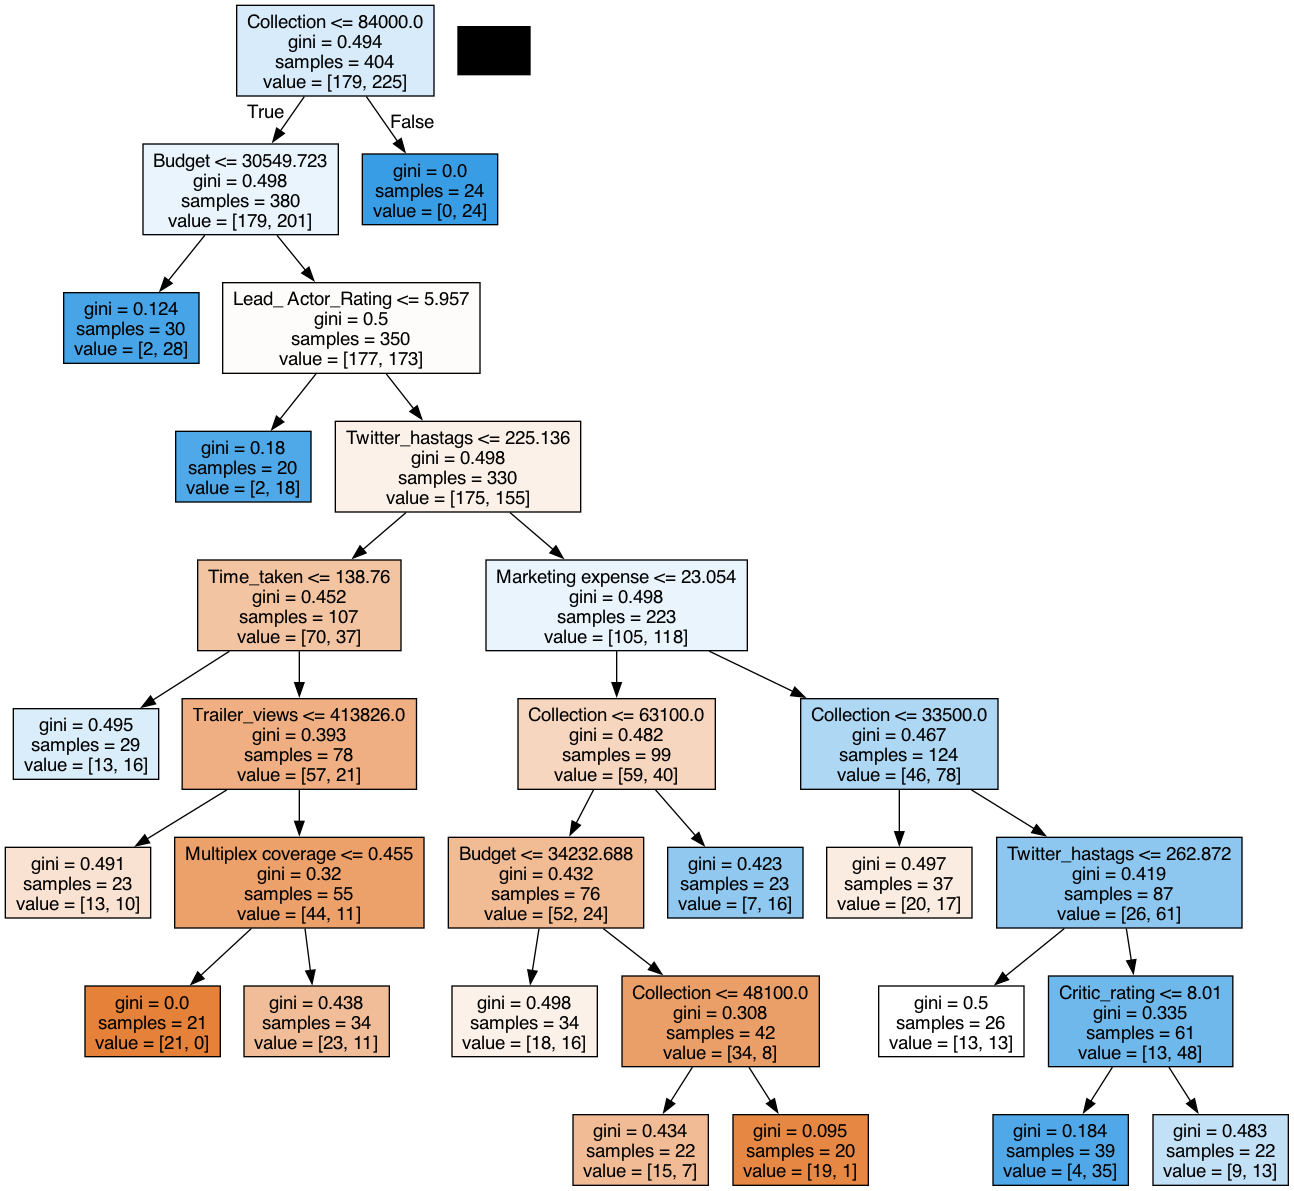

In [62]:
dot_data = export_graphviz(cls_tree3,out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Finding best hyperparameters

In [66]:
best_score = 0
best_params = {}

for depth in range(1, 6):
    for split in range(2, 51):
        for leaf in range(2, 51):

            model = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                min_samples_leaf=leaf,
            )

            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)

            if score > best_score:
                best_score = score
                best_params = {
                    'max_depth': depth,
                    'min_samples_split': split,
                    'min_samples_leaf': leaf
                }

final_model = DecisionTreeClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(f"Best Accuracy: {best_score:.2f}")
print("Best Params:", best_params)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Accuracy: 0.63
Best Params: {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 39}

Confusion Matrix:
 [[40 11]
 [27 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68        51
           1       0.69      0.47      0.56        51

    accuracy                           0.63       102
   macro avg       0.64      0.63      0.62       102
weighted avg       0.64      0.63      0.62       102

